# 랭체인 구성요소
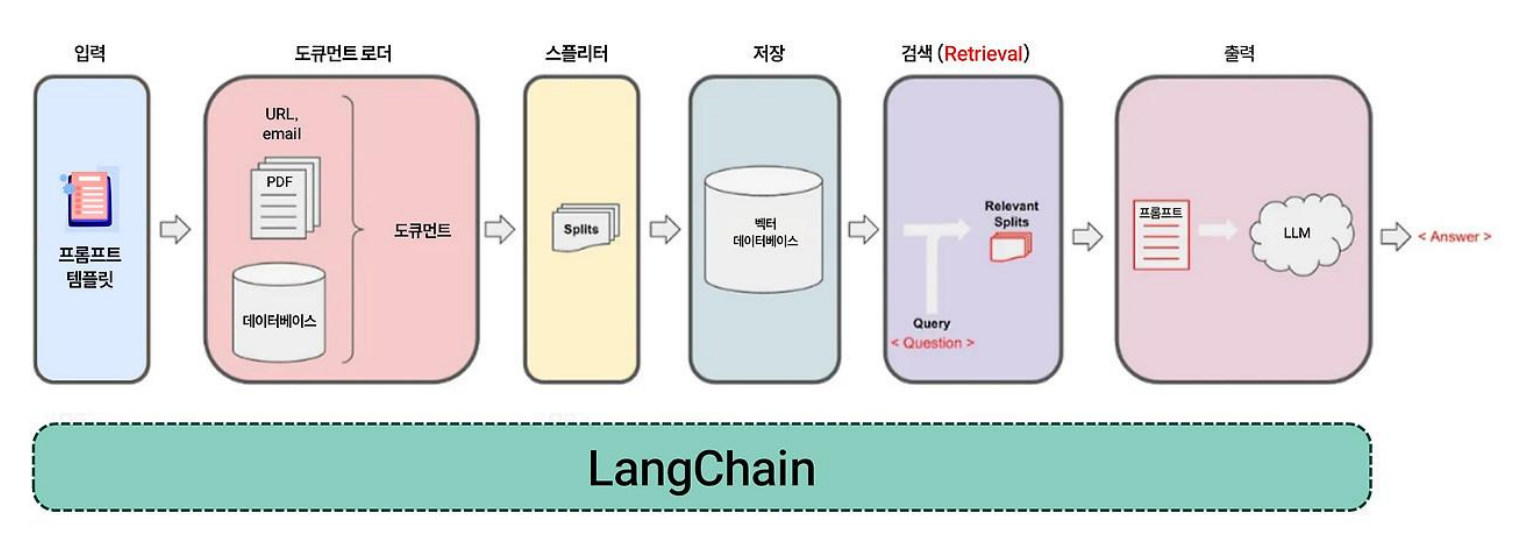

### 랭체인 기본 설치

In [ ]:
# 사전 설정
%pip install langchain
%pip install langchain_community
%pip install langchain_openai
%pip install langchain_ollama

In [1]:
# from langchain.chat_models import ChatOpenAI
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate, ChatPromptTemplate, FewShotPromptTemplate
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage 
from langchain_ollama import ChatOllama

In [2]:
gpt = ChatOpenAI( model="gpt-3.5-turbo", temperature=0) # key 설정을 하지 않은 것을 볼 수 있는데요. key 를 지정하지 않으면 환경변수에서 key 를 환경변수에서 자동을 읽어오게 됩니다.

# 랭체인 기본 사용

### Langchain Invoke( )

In [ ]:
# 반드시 환경변수에 OPENAI_API_KEY를 설정해야 합니다.
# gpt = ChatOpenAI( model="gpt-3.5-turbo", temperature=0,api_key="sk-...")
#rst = gpt.invoke( [HumanMessage(content="인공지능에 대해 설명해줘"] )
# gpt = ChatOllama(model="exaone3.5", temperature=0)
gpt = ChatOpenAI( model="gpt-5-nano", temperature=0) # 모델은 자유롭게 갈아끼우면 됩니다. 수많은 API 사용은 동일한 인터페이스로 사용됩니다. 
rst = gpt.invoke( "인공지능에 대해 설명해줘" )
# print( type(rst) )
print( rst)
# print( rst.content )

content='인공지능은 인간의 학습, 추론, 판단 등의 능력을 컴퓨터 프로그램이나 기계에 구현한 기술을 말합니다. 이를 통해 기계가 인간과 유사한 지능적인 작업을 수행할 수 있게 됩니다. 인공지능은 머신 러닝, 딥 러닝, 자연어 처리, 컴퓨터 비전 등 다양한 분야에서 활용되며, 의료, 금융, 자율주행차, 로봇공학 등 다양한 산업 분야에서 혁신적인 변화를 가져오고 있습니다. 인공지능 기술은 빠르게 발전하고 있으며, 미래에는 더욱 다양한 분야에서 인간의 생활을 편리하고 효율적으로 만들어 줄 것으로 기대됩니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 271, 'prompt_tokens': 19, 'total_tokens': 290, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CSBLQquV0XMsMLOJxWDA5mY5UAV3e', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--18cf5e59-21dd-4916-9f8d-8b48470655be-0' usage_metadata={'input_tokens': 19, 'output_tokens': 271, 'total_tokens': 290, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'o

In [ ]:
messages = [
    SystemMessage(content="You are a helpful assistant."),
    HumanMessage(content="What is AI?") ]

gpt = ChatOpenAI( model="gpt-3.5-turbo", temperature=0)
# gpt = ChatOllama(model="exaone3.5", temperature=0)
rst = gpt.invoke( messages )
print( rst.content )

### Langchain Stream( )

- stream 은 Token 이 도착하자마자 바로바로 확인할 수 있다. 
- 모든 Token 이 도착하기를 기다리는 Invoke 와의 차이점이 있다.

In [7]:
rst = gpt.stream( "인공지능에 대해 5개로 요약해서 설명해줘 " )
print(rst)
print( '================================' )
for chunk in rst:
    print(chunk)
    print( chunk.content, end="" )

<generator object BaseChatModel.stream at 0x000001FCD3EB26C0>
content='' additional_kwargs={} response_metadata={} id='run--1c3637d4-d955-49d6-954f-ce15a1b93e51'
content='1' additional_kwargs={} response_metadata={} id='run--1c3637d4-d955-49d6-954f-ce15a1b93e51'
1content='.' additional_kwargs={} response_metadata={} id='run--1c3637d4-d955-49d6-954f-ce15a1b93e51'
.content=' 인' additional_kwargs={} response_metadata={} id='run--1c3637d4-d955-49d6-954f-ce15a1b93e51'
 인content='공' additional_kwargs={} response_metadata={} id='run--1c3637d4-d955-49d6-954f-ce15a1b93e51'
공content='지' additional_kwargs={} response_metadata={} id='run--1c3637d4-d955-49d6-954f-ce15a1b93e51'
지content='능' additional_kwargs={} response_metadata={} id='run--1c3637d4-d955-49d6-954f-ce15a1b93e51'
능content='은' additional_kwargs={} response_metadata={} id='run--1c3637d4-d955-49d6-954f-ce15a1b93e51'
은content=' 기' additional_kwargs={} response_metadata={} id='run--1c3637d4-d955-49d6-954f-ce15a1b93e51'
 기content='계' additi

### Langchain Generate( )
- 여러 개의 요청 한번에 처리 가능 

In [8]:
messages_batch = [
    [HumanMessage(content="인공지능에 대해 간단히 알려줄래")],
    [HumanMessage(content="파이썬에 대해 간단히 알려줄래")]
]
generatedModel = ChatOpenAI( model="gpt-3.5-turbo", temperature=1)
# generatedModel = ChatOllama(model="exaone3.5", temperature=0)
response = generatedModel.generate(messages_batch, n = 2) # generate 함수는 generate([message1, message2, ...]) 형태로 여러개의 메시지를 한번에 처리할 수 있습니다. 또한 generate(batch, n = 1) 매개변수를 통해서 한 메시지에 대해서 여러개의 답변을 받을 수도 있습니다.
print( response)
print( response.generations[0][0].text )
print('===========')
print( response.generations[0][1].text )
print('===========')
print( response.generations[1][0].text )

generations=[[ChatGeneration(text='인공지능이란 인간의 지능적인 작업을 컴퓨터나 기계 등을 통해 모방하여 수행하는 기술을 말합니다. 이를 통해 인공지능은 사람이 수행하는 작업을 자동화하거나 인간의 판단이나 의사 결정을 지원하는 역할을 합니다. 대표적으로 음성인식, 이미지 인식, 언어 번역, 게임 등 다양한 분야에 인공지능 기술이 적용되고 있습니다.', generation_info={'finish_reason': 'stop', 'logprobs': None}, message=AIMessage(content='인공지능이란 인간의 지능적인 작업을 컴퓨터나 기계 등을 통해 모방하여 수행하는 기술을 말합니다. 이를 통해 인공지능은 사람이 수행하는 작업을 자동화하거나 인간의 판단이나 의사 결정을 지원하는 역할을 합니다. 대표적으로 음성인식, 이미지 인식, 언어 번역, 게임 등 다양한 분야에 인공지능 기술이 적용되고 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'finish_reason': 'stop', 'logprobs': None}, id='run--a1643fd3-c242-4b67-9785-30250f5f357e-0', usage_metadata={'input_tokens': 28, 'output_tokens': 364, 'total_tokens': 392, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})), ChatGeneration(text='인공지능은 인간의 지능을 모방하거나 대체하기 위해 만들어진 기술이며, 컴퓨터 시스템이 인간의 학습, 추론, 판단 등의 능력을 구현하는 기술을 말합니다. 인공지능은 기계학습, 딥러닝, 자연어 처리 등 다양한 분야에서 활용되고 있으며, 머신러닝 알고리즘을 통해 스스로 학습하고 문제를 해결할

# Langchain 입력
- Langchain 의 기본 입력 방식을 살펴봅시다.



In [10]:
# 파이썬 문법 학습 
product = "컴퓨터"
s = f"{product} 제품 홍보문구 작성해줘"
print(s)

컴퓨터 제품 홍보문구 작성해줘


### Langchain PromptTemplate

In [11]:
# 편리한 프롬프트 작성을 위한 메서드
# langchain 구조상 chain 형태로 연결해서 사용하기 위해 PromptTemplate 클래스를 사용합니다.
template ="{product} 제품 홍보문구 작성해줘"
prompt = PromptTemplate( input_variables=['product'], template=template )
txt = prompt.format(product="컴퓨터")
txt

'컴퓨터 제품 홍보문구 작성해줘'

In [12]:
template ="{product} 제품 홍보문구 {desc}"
prompt = PromptTemplate( input_variables=['product', 'desc'], template=template )
txt = prompt.format( product="컴퓨터", desc="설명해줘" )
txt

'컴퓨터 제품 홍보문구 설명해줘'

In [13]:
template ="오늘은 {day}입니다. {name}님, 좋은 하루 되세요."
prompt = PromptTemplate( input_variables=['name'], 
                        partial_variables={'day': '화요일'}, 
                        template=template )
txt = prompt.format(name="홍길동")
txt

'오늘은 화요일입니다. 홍길동님, 좋은 하루 되세요.'

In [14]:
template ="{product} 제품 홍보문구 작성해줘"
prompt = PromptTemplate( input_variables=['product'], template=template )

gpt = ChatOpenAI( model="gpt-5-nano") 
rst = gpt.invoke( prompt.format(product="컴퓨터") )
# rst =gpt.invoke( "컴퓨터 제품 홍보문구 작성해줘" )
# rst =gpt.invoke( [HumanMessage(content= prompt.format(product="컴퓨터") ) ] )
print( rst.content)

좋아요! 컴퓨터 제품 홍보문구를 몇 가지 스타일로 준비해봤어요. 원하시는 카테고리(게이밍 PC, 노트북, 워크스테이션 등)나 채널(홈페이지, SNS, 이메일 등), 톤(프로페셔널, 친근한, 프리미엄 등)을 알려주시면 더 맞춤으로 다듬어 드릴게요. 우선 바로 쓸 수 있는 다양하게 골라 쓰기 좋은 예시들부터 드립니다.

1) 짧고 강한 헤드라인(헤드라인/슬로건)
- 성능의 한계를 넘어서는 파워
- 당신의 아이디어를 움직이는 컴퓨팅 파워
- 속도와 안정성의 완벽한 조합
- 오늘의 작업, 내일의 가능성
- 가볍고 강력한, 어디서나 함께하는 PC
- 디자인부터 엔지니어링까지 한 대의 워크스테이션
- 프리미엄 퍼포먼스, 합리적 선택
- 어떤 도전도 척척
- 창의력을 깨우는 스마트 워크스테이션
- 프로처럼 일하고, 프로처럼 게임하라
- 차세대 기술이 당신과 함께
- 모든 포트를 담은 올인원 솔루션
- 초고속 저장, 초고속 시작
- 냉각은 승부를 결정한다
- 당신의 생산성을 가속하는 컴퓨팅 파워

2) 짧은 카피(30–60자 내외)
- 프로세서의 힘으로 아이디어를 바로 실현하세요.
- 빠른 부팅, 매끄러운 멀티태스킹, 끝없는 가능성.
- 가볍지만 강력한 파워, 작업의 든든한 동반자.
- 디자인부터 배포까지 한 대로 해결하는 워크스테이션.
- 미래를 대비한 성능과 안정성의 만남.
- 고성능과 효율의 완벽한 조합.
- 한 대로 모든 것을, 하나의 해결책으로.

3) 긴 스토리텔링 형 광고 문구(스토리텔링 2편)
편1) 아이디어가 떠오르는 순간, 화면은 당신의 의도를 정확히 이해합니다. 클릭 하나로 렌더링이 시작되고, 복잡한 데이터를 실시간으로 확인합니다. 이 PC와 함께라면 아이디어에서 결과물까지의 여정이 매끄럽고 빠릅니다. 한 대의 컴퓨터가 창작의 속도를 좌우합니다.

편2) 하루의 업무가 흐름처럼 흘러갑니다. 다중 작업 창이 밀려도 버거움 없이 반응하고, 대용량 파일도 초고속 저장으로 숨 가쁘지 않습니다. 냉각 시스템은 열기를 잡아두고, 확장성은 미래의 필요를 이미 준비합니

### Langchain ChatPromptTemplate 
- '대화'를 위한 프롬프트 작성을 돕는 메서드

In [ ]:
# ChatPromptTemplate 기본 사용법
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant."),
    ("human", "{product} 제품 홍보문구 작성해줘")
])
prompt.format_messages(product="컴퓨터")

[SystemMessage(content='You are a helpful assistant.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='컴퓨터 제품 홍보문구 작성해줘', additional_kwargs={}, response_metadata={})]

In [ ]:
# ChatPromptTemplate 와 ChatOpenAI 조합 사용법
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant."),
    ("human", "{product} 제품 홍보문구 작성해줘")
])
gpt = ChatOpenAI( model="gpt-5-nano") 
rst = gpt.invoke( prompt.format_messages(product="컴퓨터") )
print( rst.content)

좋아요! 어떤 제품군이나 톤으로 원하시는지 알려주시면 더 정확하게 맞춰드리겠습니다. 우선 바로 사용할 수 있는 다양한 홍보문구 예시를 드립니다.

1) 게이밍 PC 홍보문구
- 슬로건 1: 프레임을 지배하는 파워
  - 설명: 최신 구성과 강력한 냉각으로 매 프레임 끊김 없이 몰입감을 선사합니다.
  - SNS 캡션: 게임의 한계를 넘다. 지금 바로 체험하라.
  - 랜딩헤더/서브헤더: 헤더 - 게임의 가능성을 재정의하는 성능 / 서브 - 강력한 퍼포먼스와 냉각으로 프레임 드랍 없이 몰입
- 슬로건 2: 한 대의 PC로 경험의 경계를 확장하다
  - 설명: 그래픽부터 로딩까지 빠르게, 긴 시간 플레이에도 안정적인 파워.
  - SNS 캡션: 더 빠르게, 더 선명하게. 당신의 다음 게임은 이 PC에서 시작됩니다.
- 슬로건 3: 끊김 없는 몰입, 끝없는 승리
  - 설명: 최신 CPU+GPU와 효율적 냉각으로 지속 가능한 퍼포먼스 제공.

2) 업무용 워크스테이션 홍보문구
- 슬로건 1: 프로젝트를 앞당기는 신뢰성
  - 설명: 강력한 멀티태스킹과 안정성으로 긴 작업도 문제없이.
  - 랜딩헤더/서브헤더: 헤더 - 생산성을 끌어올리는 워크스테이션 / 서브 - 대형 데이터와 멀티스레드 작업에 최적화
- 슬로건 2: 멀티태스킹의 자유, 한 대의 PC로
  - 설명: 대용량 데이터 처리와 크리에이티브 작업 모두를 원스톱 해결.
  - SNS 캡션: 팀의 속도를 높이는 파워풀한 파트너.
- 슬로건 3: 안정성과 성능의 만남
  - 설명: 신뢰성 높은 플랫폼으로 비즈니스 연속성을 보장합니다.

3) 슬림 노트북 홍보문구
- 슬로건 1: 얇다, 가볍다, 하지만 끝없는 파워
  - 설명: 휴대성과 생산성의 완벽한 조합.
  - SNS 캡션: 어디서나 당신의 아이디어를 펼치다.
- 슬로건 2: 항상 함께하는 생산성
  - 설명: 긴 배터리 수명과 빠른 속도, 세련된 디자인.
  - 랜딩헤더/서브헤더: 헤더 - 이동이 자유로운 업무 파트너 / 서브 - 가볍지만 강력한 성능으로 

In [18]:
# 대화 형태의 프롬프트 작성
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful teacher"),
    ("human", "Are there other measure besides time complexity for an {algorithm}?"),
    ("ai", "Yes, there are other measures besides time complexity for an {algorithm}, such as space complexity."),
    ("human", "What is it?"),
])
gpt = ChatOpenAI(model="gpt-5-nano")
rst = gpt.invoke( prompt.format_messages(algorithm="algorithm") )
print(rst.content)

Space complexity is the measure of how much memory an algorithm uses as a function of the input size n.

Key points:
- It can refer to auxiliary space (extra memory the algorithm uses beyond the input) or total space (including the input itself).
- It accounts for variables, data structures, and the call stack from recursion, not just the size of the input.

Common categories:
- O(1) space (constant): uses a fixed amount of extra memory regardless of n. Examples: finding the maximum of two numbers, binary search (iterative version) uses a few variables.
- O(n) space (linear): uses memory proportional to n. Examples: creating a new array of size n to store results, dynamic programming tables of size n.
- O(log n) space: often seen with recursive algorithms that divide the problem (e.g., some balanced recursive searches); the exact amount depends on the recursion depth.
- O(n) recursion stack: many recursive algorithms use stack space proportional to depth of recursion (e.g., DFS on a gr

### Langchain FewShotPromptTemplate 
- 퓨샷 프롬프팃을 위한 메서드 

In [20]:
exmaples = [{"input": "Hello","output":"안녕하세요"},
            {"input": "Goodbye","output":"안녕히 가세요"}]

exmaple_promt = PromptTemplate(input_variables=["input", "output"],
                               template="Input: {input}\nOutput: {output}")

few_shot_prompt = FewShotPromptTemplate(
    examples=exmaples, # 예제 리스트
    example_prompt=exmaple_promt, # 예제 템플릿
    input_variables=["input"], # 입력 변수
    suffix="Input: {input}\nOutput:", # 실제 프롬프트 입력 받을 부분
)

fprompt = few_shot_prompt.format(input="Good night")
print( fprompt)


Input: Hello
Output: 안녕하세요

Input: Goodbye
Output: 안녕히 가세요

Input: Good night
Output:


In [21]:
gpt = ChatOpenAI( model="gpt-5-nano", temperature=1)
rst = gpt.invoke( fprompt )
print( rst.content )

안녕히 주무세요
